# Use case 4: Observatory events

In [1]:
import showermodel as sm

This notebook describes how to construct an observatory made of several telescopes using the `Observatory` class (and its subclasses) and how to use the `Event` class, which uses the `Signal` and `Observatory` classes. These classes include advanced methods to show the geometry of an observatory that detects a shower.

### Construction of an `Observatory` object

An `Observatory` object is a list of telescopes with some additional attributes and methods.

In [2]:
telescope1 = sm.Telescope(x=0.1, y=0.2, theta=20.)
telescope2 = telescope1.copy(x=0.2, y=0.1)
telescope3 = telescope1.copy(x=-0.3, y=-0.1)
observatory = sm.Observatory(telescope1, telescope2, telescope3, obs_type="MyObservatory")

# Some attributes of Observatory objects
print("Observatory type:", observatory.obs_type)
print("Number of telescopes:", observatory.N_tel)
print("Type of telescopes:", observatory.tel_type)
print("Aperture of telescopes in degrees:", observatory.tel_apert)
print("Central position of the observatory:", (observatory.x_c, observatory.y_c, observatory.z_c))

Observatory type: MyObservatory
Number of telescopes: 3
Type of telescopes: None
Aperture of telescopes in degrees: 10.0
Central position of the observatory: (0.1, 0.2, 0.0)


Note: The `Observatory` attributes `tel_type`, `tel_apert`, etc. are set to be equal to those of the first input `Telescope` object, even if the `Observatory` object is made up of `Telescopes` objects with different parameters.

More `Telescope` objects can be added later.

In [3]:
observatory.append(telescope1.copy(x=0., y=0., apert=5., theta=10., az=56.))

A `show` method is available to show a 2D plot of telescope positions and indexes.

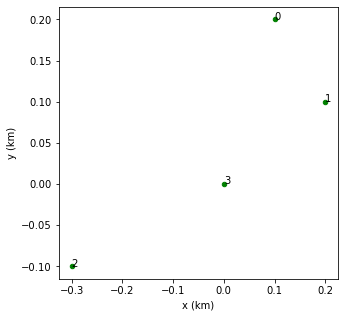

In [4]:
observatory.show();

Individual `Telescope` objects can be accessed via an index (starting at 0).

In [5]:
print("Pointing of second telescope:", (observatory[1].theta, observatory[1].az))
print("Pointing of last telescope:", (observatory[-1].theta, observatory[-1].az))

Pointing of second telescope: (20.0, 0.0)
Pointing of last telescope: (10.0, 56.0)


Help on `Observatory`.

In [6]:
# sm.Observatory?

### Predefined `Observatory` objects: Circular array of 25 telescopes

By default, a radius of 341 m and `IACT` telescopes pointing at zenith are assumed, but the observatory position (center), the radius, the telescope pointing and the array orientation can be modified.

Observatory type: Array25
Number of telescopes: 50
Type of telescopes: IACT
Center of the array: (0.2, 0.2, 0.5)


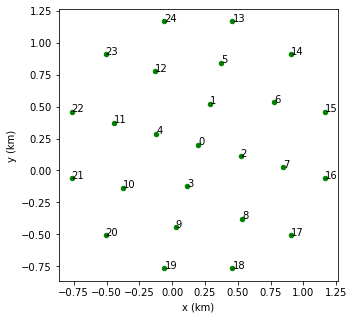

In [7]:
# Default Array25 object
# observatory2 = sm.Array25()

# User-defined
observatory2 = sm.Array25(x_c=0.2, y_c=0.2, z_c=0.5, R=1., theta=20., az= 120., rot_angle=15.)

print("Observatory type:", observatory2.obs_type)
print("Number of telescopes:", observatory2.N_tel)
print("Type of telescopes:", observatory2.tel_type)
print("Center of the array:", (observatory2.x_c, observatory2.y_c, observatory2.z_c))

observatory2.show();

The type of telescopes of the array can also be modified.

In [8]:
# telescope1 = sm.Telescope(theta=30., az= 10.) # Instead of IACT
# observatory2 = sm.Array25(telescope=telescope1, R=1., theta=20., az= 120.)  # theta and az are overwritten

Help on `Array25`.

In [9]:
# sm.Array25?

### Predefined `Observatory` objects: Rectangular grid of telescopes

The default `Grid` object is made of objects of class `GridElement`, which is a subclass of `Telescope`, with 100 % efficiency in the 290-430 nm range and 180 degrees aperture around zenith. As a `Grid` object is constructed, the detection area of the constituent `GridElement` objects is set equal to the grid cell area.

Observatory type: Grid
Number of telescopes: 200
Type of telescopes: GridElement
Center of the array: (0.0, 0.0, 0.0)
Telescope detection area in m^2: 40000.00000000001


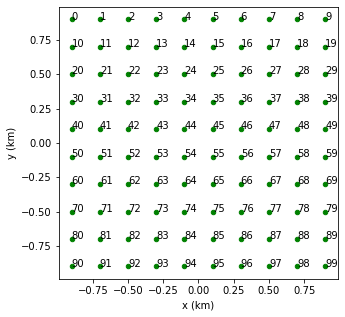

In [10]:
# Default Grid object
observatory3 = sm.Grid()

print("Observatory type:", observatory3.obs_type)
print("Number of telescopes:", observatory3.N_tel)
print("Type of telescopes:", observatory3.tel_type)
print("Center of the array:", (observatory3.x_c, observatory3.y_c, observatory3.z_c))
print("Telescope detection area in m^2:", observatory3.tel_area)

observatory3.show();

Note: A `Grid` object is generated when calling the `show_distribution` method of `Shower` (see UC3).

The grid position, dimensions, granularity and telescope type can be modified.

In [11]:
# 1D grid of IACT telescopes along the x axis
# observatory3 = sm.Grid(telescope=sm.IACT(), theta=20., az= 10., x_c=0.1, y_c=-0.3, size_x=4., size_y=0.1, N_x=10, N_y=1)

Note: If a telescope is input (not None), the telescope detection area is used instead of the grid cell area.

Help on `Grid`.

In [12]:
# sm.Grid?

### `Event` objects

An `Event` object contains a `Shower` object, an `Observatory` object as well as lists of `Projection` and `Signal` objects. By default, signals are calculated including both atmospheric transmission and detection efficiency.

In [13]:
shower = sm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = sm.Array25(R=1., theta=22., az= 45.)
event1 = sm.Event(observatory, shower)

# Equivalent method of Shower
# event1 = shower.Event(observatory)

Both the atmospheric transmission and detection efficiency may be turned off. In case that the detection efficiency is turned off, the wavelength range can also modified (see UC3).

In [14]:
event2 = sm.Event(observatory, shower, atm_trans=False, tel_eff=False)

The `Atmosphere`, `Track`, `Profile`, `Fluorescence` and `Cherenkov` objects contained in the `Shower` object can be accessed by attributes of `Event` as well.

In [15]:
event1.track  # Equivalent to event1.shower.track
# event1.profile.show();

,x,y,z,t
0,0.225884,0.125884,0.100572,392.335254
1,0.277651,0.177651,0.301716,391.621268
2,0.329419,0.229419,0.502860,390.907282
3,0.381187,0.281187,0.704004,390.193296
4,0.432954,0.332954,0.905148,389.479310
...,...,...,...,...
545,28.439221,28.339221,109.724052,3.212937
546,28.490988,28.390988,109.925196,2.498951
547,28.542756,28.442756,110.126340,1.784965
548,28.594523,28.494523,110.327484,1.070979


`Telescope`, `Signal` and `Projection` objects are elements of the lists `observatory`, `signals` and `projections`, respectively.

In [16]:
signals1 = event1.signals
signals2 = event2.signals
projections = event1.projections

print("Position of sixth telescope:", (observatory[5].x, observatory[5].y, observatory[5].z))
print("Total number of photoelectrons in sixth telescope:", signals1[5].Npe_total_sum)
print("The same but without atmospheric transmission or detection efficiency:", signals2[5].Npe_total_sum)

projections[5]

Position of sixth telescope: (0.0, 0.6666666666666666, 0.0)
Total number of photoelectrons in sixth telescope: 13.833232485684189
The same but without atmospheric transmission or detection efficiency: 75.54733842334073


,distance,alt,az,theta,phi,beta,time,FoV
0,0.594630,9.737464,157.329815,89.052195,198.592918,88.231590,1.917205,False
1,0.638168,28.215188,150.413108,69.474364,197.939897,68.643363,1.348445,False
2,0.743351,42.568974,143.005917,53.928459,197.293713,53.087170,0.985302,False
3,0.888549,52.401654,135.320868,42.833326,196.654419,41.981857,0.755633,False
4,1.057405,58.871325,127.624325,35.061301,196.022063,34.199761,0.604877,False
...,...,...,...,...,...,...,...,...
545,116.678735,70.117930,45.782795,2.136284,139.996259,0.291859,0.000041,True
546,116.892785,70.117718,45.781354,2.136006,139.984014,0.291324,0.000032,True
547,117.106835,70.117505,45.779917,2.135729,139.971810,0.290792,0.000023,True
548,117.320885,70.117294,45.778486,2.135454,139.959648,0.290261,0.000014,True


Help on `Event`.

In [17]:
# sm.Event?

### Special methods of `Event` objects

The event geometry can be shown in either a 2D or 3D plot. By default, an area of 1x1 km$^2$ centered at the origin is shown, but this can be changed.

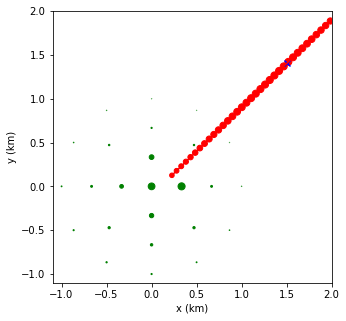

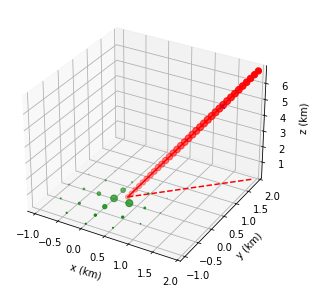

In [18]:
# Default 2D and 3D plots
# event1.show_geometry2D();
# event1.show_geometry3D();

# Setting visualization area at ground level
event1.show_geometry2D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);
event1.show_geometry3D(x_min=-1.1, x_max=2., y_min=-1.1, y_max=2.);

Note 1: By default, the size of shower points are proportional to the energy deposited in each step length and the size of telescope points are proportional to the integrated signal.  
Note 2: A blue cross marks the shower maximum.

More options of `show_geometry2D` and `show_geometry3D` are described in the help.

In [19]:
# event1.show_geometry2D?
# event1.show_geometry3D?

`Event` objects have the method `show_projection` which is equivalent to the method `show` of `Projection`. The telescope index can be passed as an argument. If not given, the first telescope (`tel_index=0`) is assumed.

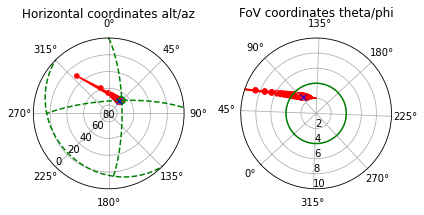

In [20]:
event1.show_projection(tel_index=2, max_theta=10.);

Help on `show_projection` method.

In [21]:
# event1.show_projection?

In addition, a `show_distribution` method is defined in a similar way as in `Shower` objects but with different default options. It generates a `Grid` object based on the first telescope (`tel_index=0`) of the `Observatory` object used to construct the `Event` object.

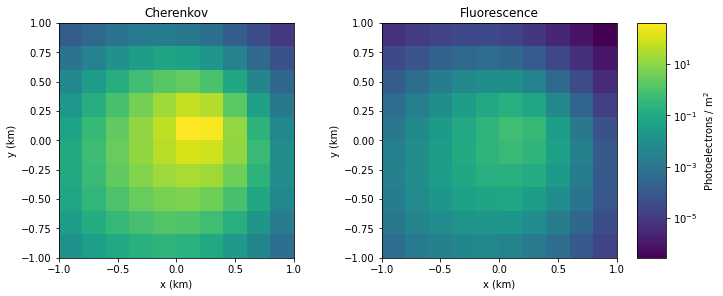

In [22]:
shower = sm.Shower(x0=0.2, y0=0.1, theta=20., az=45.)
observatory = sm.Array25(R=1., theta=22., az= 45.)
event1 = sm.Event(observatory, shower)

event1.show_distribution(size_x=2., size_y=2., N_x=10, N_y=10);

The telescope efficiency can be turned off to obtain the distribution of photons (instead of photoelectrons).

In [23]:
# event1.show_distribution(size_x=2., size_y=0.1, N_x=30, N_y=1, tel_eff=False, wvl_ini=290., wvl_fin=450.);

# Equivalent to
# event2 = sm.Event(observatory, shower, tel_eff=False, wvl_ini=290., wvl_fin=450.)
# event2.show_distribution(x_size=1., y_size=0.1, N_x=10, N_y=1)

Alternatively, an existing `Grid` object can be passed as argument to the `GridEvent` class, which is a subclass of `Event` but using a `Grid` object as observatory. The method `show_distribution` of `GridEvent` objects has no input parameters.

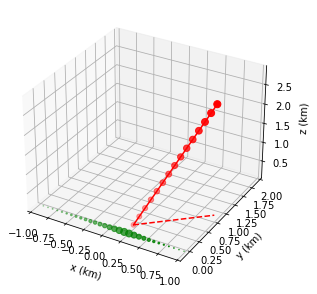

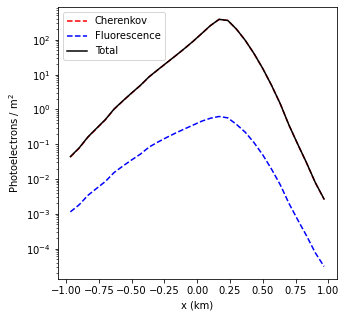

In [24]:
grid = sm.Grid(telescope=sm.IACT(), size_x=2., size_y=0.1, theta=22., az= 45., N_x=30, N_y=1)
grid_event = sm.GridEvent(grid, shower)
grid_event.show_geometry3D(y_min=-0.2, y_max=2.);
grid_event.show_distribution();